# 確率分布

## 離散確率分布

### ベルヌーイ分布

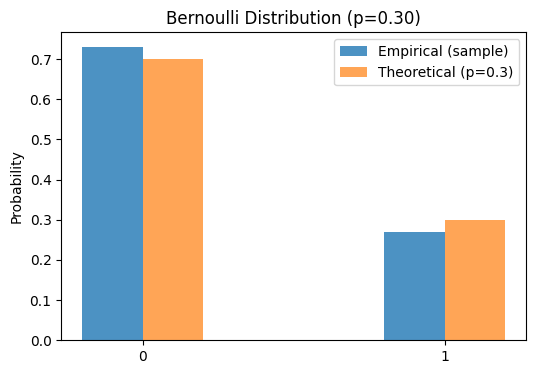

In [14]:
# セル1: Bernoulli の経験分布 vs 理論 PMF
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

p = 0.3
N = 100

# サンプル（SciPy の rvs でも良いが、ここではNumPy RNGを使う）
rng = np.random.default_rng(42)
samples = rng.binomial(1, p, size=N)  # Bernoulli は n=1 の binomial と同じ

# 経験確率
values, counts = np.unique(samples, return_counts=True)
probs = counts / N

# 理論 PMF（scipy）
k = np.array([0, 1])
theoretical = bernoulli.pmf(k, p)  # [P(X=0), P(X=1)]

# 描画
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(values - 0.1, probs, width=0.2, label="Empirical (sample)", alpha=0.8)
ax.bar(k + 0.1, theoretical, width=0.2, label=f"Theoretical (p={p})", alpha=0.7)

ax.set_xticks([0, 1])
ax.set_xticklabels(["0", "1"])
ax.set_ylabel("Probability")
ax.set_title("Bernoulli Distribution (p={:.2f})".format(p))
ax.legend()
plt.show()


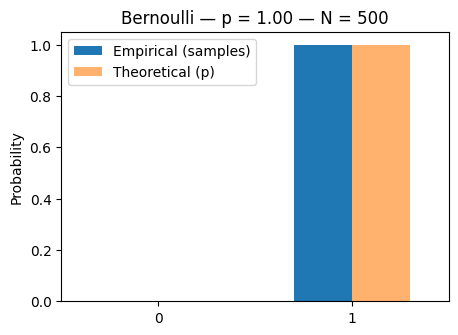

In [15]:
# セル2: p を動かすアニメーション（Notebook 内表示）
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.stats import bernoulli

p_values = np.linspace(0.0, 1.0, 41)
N_anim = 500  # 各フレームでのサンプル数

fig_anim, ax_anim = plt.subplots(figsize=(5, 3.5))
ax_anim.set_xlim(-0.5, 1.5)
ax_anim.set_ylim(0, 1.05)
ax_anim.set_xticks([0, 1])
ax_anim.set_xticklabels(["0", "1"])
ax_anim.set_ylabel("Probability")
title = ax_anim.set_title("")

# 棒の準備（左: 経験, 右: 理論）
x_emp = np.array([0, 1]) - 0.15
x_theo = np.array([0, 1]) + 0.15
width = 0.3
emp_bars = ax_anim.bar(x_emp, [0, 0], width=width)
theo_bars = ax_anim.bar(x_theo, [0, 0], width=width, alpha=0.6)
ax_anim.legend(["Empirical (samples)", "Theoretical (p)"])

rng = np.random.default_rng(123)  # 再現性（サンプリング用）


def update(frame):
    p = p_values[frame]
    # サンプル：Bernoulli は binomial(n=1) と同義
    samples = rng.binomial(1, p, size=N_anim)
    values, counts = np.unique(samples, return_counts=True)
    probs = np.zeros(2)
    probs[values.astype(int)] = counts / N_anim

    # SciPy で理論 PMF
    theo = bernoulli.pmf(np.array([0, 1]), p)

    # 棒の高さ更新
    for rect, h in zip(emp_bars, probs):
        rect.set_height(h)
    for rect, h in zip(theo_bars, theo):
        rect.set_height(h)
    title.set_text(f"Bernoulli — p = {p:.2f} — N = {N_anim}")
    return list(emp_bars) + list(theo_bars) + [title]


anim = FuncAnimation(fig_anim, update, frames=len(p_values), interval=120, blit=True)
# Notebook に埋め込む（ブラウザ内で再生される）
HTML(anim.to_jshtml())


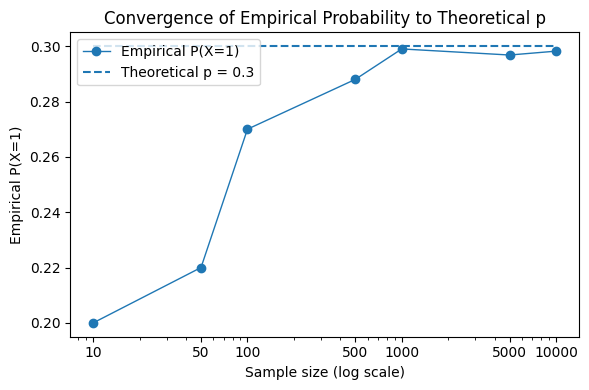

In [16]:
# セル3: 収束確認（経験 P(X=1) -> 理論 p）
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

p_fixed = 0.3
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
empirical_probs = []

rng = np.random.default_rng(12345)

for n in sample_sizes:
    samples = rng.binomial(1, p_fixed, size=n)
    empirical_probs.append(samples.mean())

fig_conv, ax_conv = plt.subplots(figsize=(6, 4))
ax_conv.plot(
    sample_sizes, empirical_probs, marker="o", linewidth=1, label="Empirical P(X=1)"
)
ax_conv.hlines(
    p_fixed,
    sample_sizes[0],
    sample_sizes[-1],
    linestyles="dashed",
    label=f"Theoretical p = {p_fixed}",
)
ax_conv.set_xscale("log")
ax_conv.set_xlabel("Sample size (log scale)")
ax_conv.set_ylabel("Empirical P(X=1)")
ax_conv.set_title("Convergence of Empirical Probability to Theoretical p")
ax_conv.set_xticks(sample_sizes)
ax_conv.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax_conv.legend()
plt.tight_layout()
plt.show()


### 二項分布

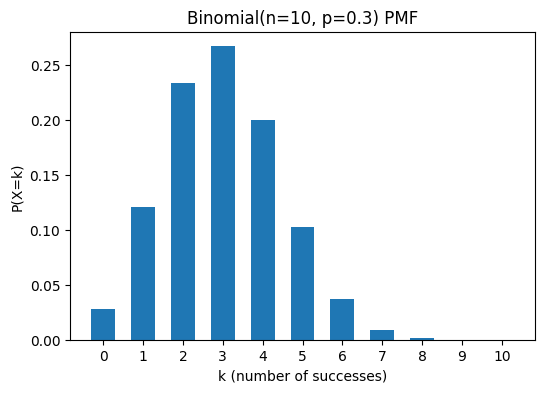

In [11]:
# === セル1: 理論 PMF を描く（単純確認用） ===
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 10
p = 0.3
k = np.arange(n + 1)

# PMF を SciPy で計算
pmf = binom.pmf(k, n, p)

plt.figure(figsize=(6, 4))
plt.bar(k, pmf, width=0.6)
plt.xlabel("k (number of successes)")
plt.ylabel("P(X=k)")
plt.title(f"Binomial(n={n}, p={p}) PMF")
plt.xticks(k)
plt.show()


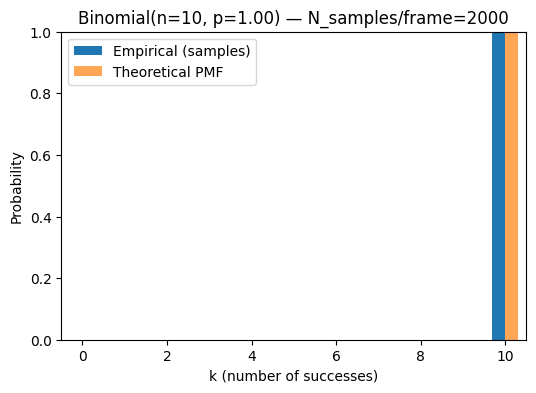

In [12]:
# === セル2: p をスイープするアニメーション（Notebook 内表示用, SciPy版） ===
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.stats import binom

# パラメータ
n = 10
p_values = np.linspace(0.0, 1.0, 41)
N_per_frame = 2000  # 各フレームでのサンプル数

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(-0.5, n + 0.5)
ax.set_ylim(0, 1.0)
ax.set_xlabel("k (number of successes)")
ax.set_ylabel("Probability")
title = ax.set_title("")

# 初期のバー（経験分布）
bars_emp = ax.bar(
    np.arange(n + 1) - 0.15, np.zeros(n + 1), width=0.3, label="Empirical (samples)"
)
# 理論 PMF のバー
bars_theo = ax.bar(
    np.arange(n + 1) + 0.15,
    np.zeros(n + 1),
    width=0.3,
    alpha=0.7,
    label="Theoretical PMF",
)
ax.legend()


def update(frame):
    p = p_values[frame]
    # サンプルを生成（各サンプルは "成功回数" を返す）
    samples = np.random.binomial(n, p, size=N_per_frame)
    counts = np.bincount(samples, minlength=n + 1)
    emp_probs = counts / N_per_frame

    # SciPyで理論PMFを計算
    theo = binom.pmf(np.arange(n + 1), n, p)

    # 更新
    for rect, h in zip(bars_emp, emp_probs):
        rect.set_height(h)
    for rect, h in zip(bars_theo, theo):
        rect.set_height(h)
    title.set_text(f"Binomial(n={n}, p={p:.2f}) — N_samples/frame={N_per_frame}")
    return list(bars_emp) + list(bars_theo) + [title]


anim = FuncAnimation(fig, update, frames=len(p_values), interval=120, blit=True)

# Notebook 内に埋め込み
HTML(anim.to_jshtml())


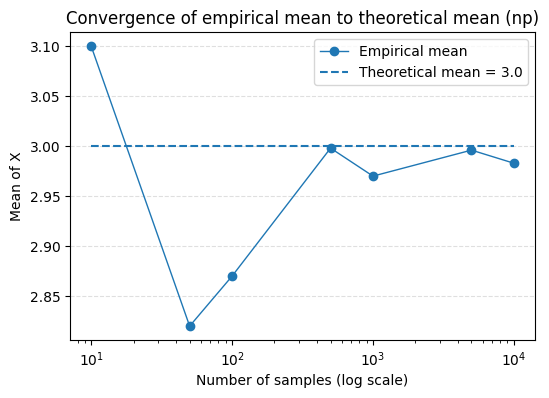

In [13]:
# === セル3: 収束確認（経験平均 -> 理論平均 np, SciPy版） ===
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 10
p = 0.3
theoretical_mean = binom.mean(n, p)  # n*p と同じ

sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
empirical_means = []

rng = np.random.default_rng(12345)
for N in sample_sizes:
    samples = rng.binomial(n, p, size=N)  # 各サンプルは "成功回数"
    empirical_means.append(samples.mean())

plt.figure(figsize=(6, 4))
plt.plot(sample_sizes, empirical_means, marker="o", linewidth=1, label="Empirical mean")
plt.hlines(
    theoretical_mean,
    sample_sizes[0],
    sample_sizes[-1],
    linestyles="dashed",
    label=f"Theoretical mean = {theoretical_mean}",
)
plt.xscale("log")
plt.xlabel("Number of samples (log scale)")
plt.ylabel("Mean of X")
plt.title("Convergence of empirical mean to theoretical mean (np)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()
